In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
%matplotlib inline

In [2]:
os.chdir('C:\\Python\\9.Estadistica y Analisis Python\\1.Estadistica y Análisis con Python\\21.Proyecto')
#os.getcwd()
#print(os.listdir('.'))
df = pd.read_csv('train.csv')  
df#.columns   #Sib Sp No. Hermanos y Esposo, Parch(Padres e Hijos)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


Antes de pasar los datos al modelo se debe hacer una limpieza, pues el modelo no entrena bien con valores perdidos.

In [3]:
df.isna().sum(axis=0)/len(df) #Se buscan valores nulos

PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.198653
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
Cabin          0.771044
Embarked       0.002245
dtype: float64

In [4]:
df = df.drop(['Cabin'],axis=1) #Quitamos la columna cabin porque tiene demasiados valores nulos

In [5]:
df = df[df.Age.notna()]  #De la colimna age, quitamos valores las filas con valores nulos 
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,Q
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


In [6]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')

In [7]:
#Variables discretas,categoricas (se convierten en texto) u ordinales(se mantienen en num.)  
#se quitan los identificadores name, ticket y la variable continua (numerica) fare
var_disc = ['Survived', 'Pclass','Sex', 'SibSp','Parch', 'Embarked']

for i in var_disc:
    print(df[i].value_counts())  
#Con esto identifico cuales son las variables categoricas

0    424
1    290
Name: Survived, dtype: int64
3    355
1    186
2    173
Name: Pclass, dtype: int64
male      453
female    261
Name: Sex, dtype: int64
0    471
1    183
2     25
4     18
3     12
5      5
Name: SibSp, dtype: int64
0    521
1    110
2     68
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64
S    554
C    130
Q     28
Name: Embarked, dtype: int64


In [8]:
vars_cat = ['Pclass','Sex','Embarked']
# One Hot Encoding
def one_hot(df):
    for i in vars_cat:
        categorias = df[i].value_counts().index
        #print(categorias)
        for k in categorias:
            name = 'is-' + str(i) + '-' + str(k)
            #print(name)
            df[name] = np.where(df[i] == k,1,0)
        df = df.drop([i],axis= 1)
    return df

In [118]:
#for i in vars_cat:
    #categorias = df[i].value_counts().index
    #print(categorias)
    #for k in categorias:
        #name = 'is-' + str(i) + '-' + str(k)
        #print(name)

Int64Index([3, 1, 2], dtype='int64')
is-Pclass-3
is-Pclass-1
is-Pclass-2
Index(['male', 'female'], dtype='object')
is-Sex-male
is-Sex-female
Index(['S', 'C', 'Q'], dtype='object')
is-Embarked-S
is-Embarked-C
is-Embarked-Q


In [9]:
df = one_hot(df)
df.head()

,PassengerId,Survived,Name,Age,SibSp,Parch,Ticket,Fare,is-Pclass-3,is-Pclass-1,is-Pclass-2,is-Sex-male,is-Sex-female,is-Embarked-S,is-Embarked-C,is-Embarked-Q
0,1,0,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,1,0,0,1,0,1,0,0
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,0,1,0,0,1,0,1,0
2,3,1,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,1,0,0,0,1,1,0,0
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,0,1,0,0,1,1,0,0
4,5,0,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,1,0,0,1,0,1,0,0


In [10]:
df.columns

Index(['PassengerId', 'Survived', 'Name', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'is-Pclass-3', 'is-Pclass-1', 'is-Pclass-2', 'is-Sex-male',
       'is-Sex-female', 'is-Embarked-S', 'is-Embarked-C', 'is-Embarked-Q'],
      dtype='object')

In [133]:
#Outliers

In [11]:
df['family_size'] = df['SibSp'] + df['Parch']
df.head()

,PassengerId,Survived,Name,Age,SibSp,Parch,Ticket,Fare,is-Pclass-3,is-Pclass-1,is-Pclass-2,is-Sex-male,is-Sex-female,is-Embarked-S,is-Embarked-C,is-Embarked-Q,family_size
0,1,0,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,1,0,0,1,0,1,0,0,1
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,0,1,0,0,1,0,1,0,1
2,3,1,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,1,0,0,0,1,1,0,0,0
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,0,1,0,0,1,1,0,0,1
4,5,0,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,1,0,0,1,0,1,0,0,0


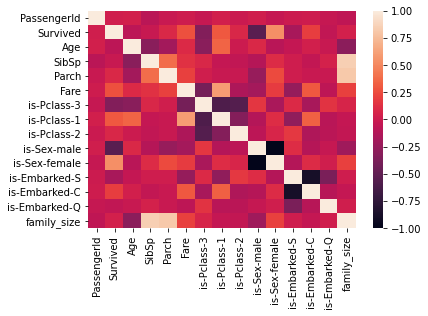

In [12]:
corr = df.corr()
sns.heatmap(corr,yticklabels = corr.columns,xticklabels=corr.columns);

In [13]:
df  = df.drop(['is-Pclass-3','is-Sex-female','is-Embarked-C'],axis=1) #Se quitan estas variables para no generar multicolinealidad
df

,PassengerId,Survived,Name,Age,SibSp,Parch,Ticket,Fare,is-Pclass-1,is-Pclass-2,is-Sex-male,is-Embarked-S,is-Embarked-Q,family_size
0,1,0,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,0,0,1,1,0,1
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,1,0,0,0,0,1
2,3,1,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,0,0,0,1,0,0
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,1,0,0,1,0,1
4,5,0,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
885,886,0,"Rice, Mrs. William (Margaret Norton)",39.0,0,5,382652,29.1250,0,0,0,0,1,5
886,887,0,"Montvila, Rev. Juozas",27.0,0,0,211536,13.0000,0,1,1,1,0,0
887,888,1,"Graham, Miss. Margaret Edith",19.0,0,0,112053,30.0000,1,0,0,1,0,0
889,890,1,"Behr, Mr. Karl Howell",26.0,0,0,111369,30.0000,1,0,1,0,0,0
